### Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading Online Sales Data
df = pd.read_csv(r'C:\Users\pc\Desktop\60DaysDS\Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### Basic Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


### Data Cleaning

In [6]:
df.isnull().sum() # we have missing values in this dataset

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [7]:
df.duplicated().sum()

0

**datatypes**

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Transaction ID']=df['Transaction ID'].astype(str)
df.dtypes

Transaction ID              object
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

### Data analysis

**Sales over time - To see the trend**

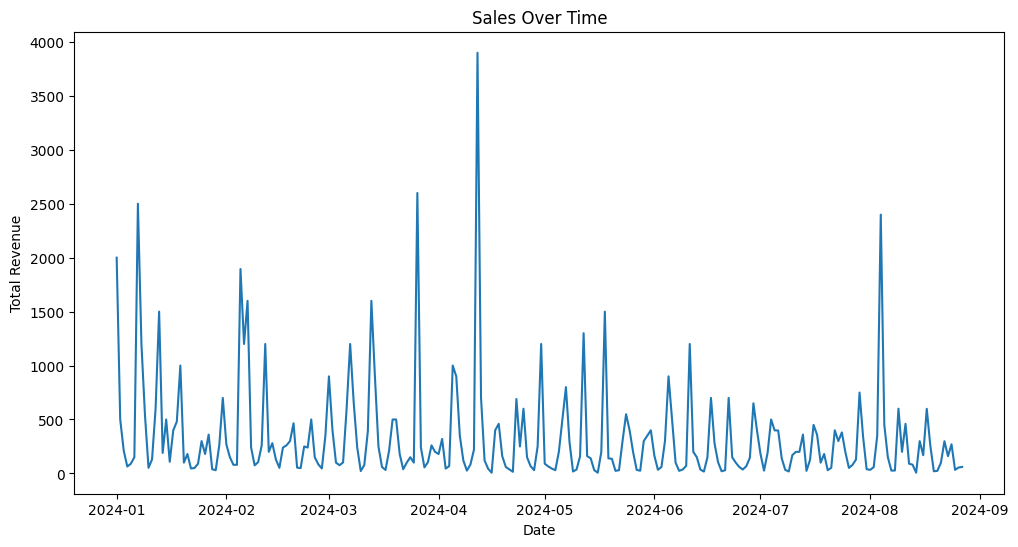

In [9]:
sales_over_time = df.groupby('Date')['Total Revenue'].sum().reset_index()
#sales_over_time

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Total Revenue'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

### Lets Analyze, see patterns and forecast Sales -  Decomposition

Time series Decomposition

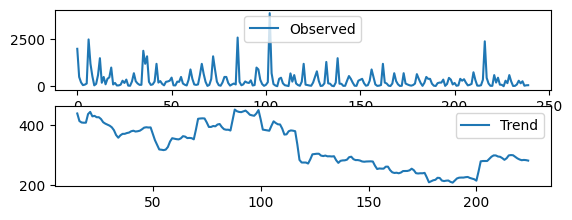

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sales_over_time['Total Revenue'],model='additive', period=30)# additive model used( T , S, E)
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')

Observed Sales Data:This plot represents the raw sales data over time.We observe high sales on certain days.
The data has significant fluctuations , showing variability in sales This indicates periods of high demand or promotional events.

Trend: This plot shows the  trend in the sales data after removing the seasonal and residual components.
The trend indicates a gradual decrease in sales over time
Towards the end, the trend slightly recovers, showing a small upward movement. Which can be the indication of future growth


**Seasonality**

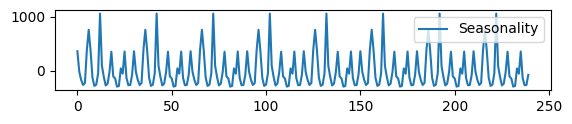

In [11]:
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')


**Noise/Error**

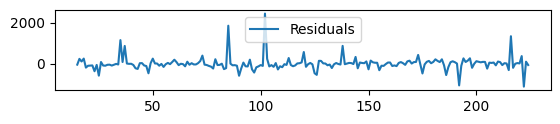

In [12]:
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')


**Sesonality**
The seasonality graph displays a clear repeating pattern with peaks approximately every 20-25 time units, indicating a consistent periodicity in sales
peaks could correspond to weekly or monthly cycles, potentially driven by factors like weekends, or promotional events.
seasonal pattern suggests that online sales are heavily influenced by periodic factors. 

**Residual/Noise**
The residuals graph represents the noise component of the time series after removing the trend&season.
The fluctuations in the residuals indicate the presence of other factors beyond seasonality
The residuals exhibit some periods of higher volatility,  around the middle and towards the end. This could be due to external factors or random events

### Sales by Region

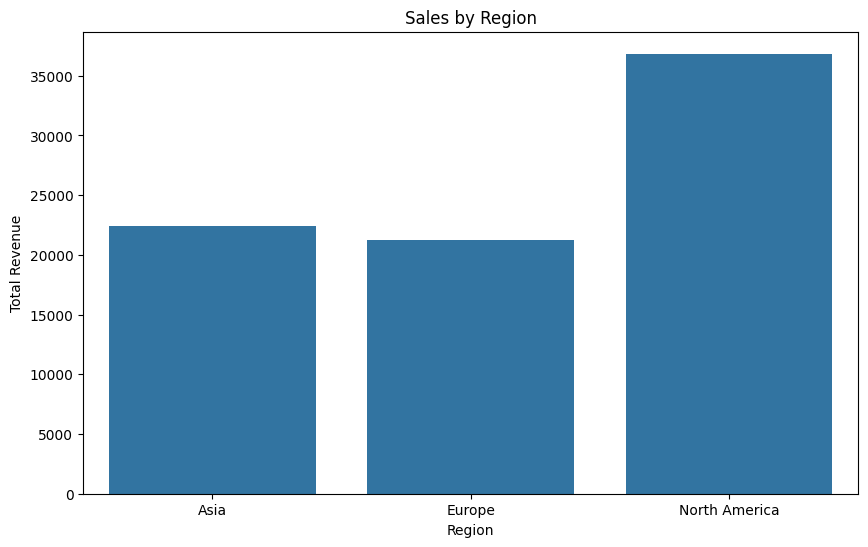

In [13]:
sales_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Revenue', data=sales_by_region)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


### Sales by category

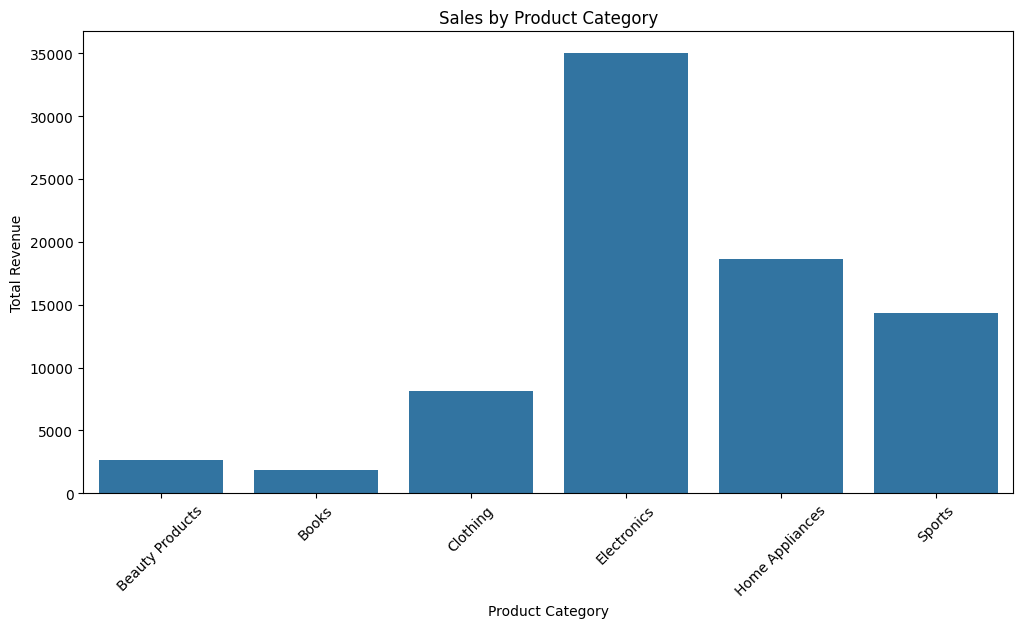

In [14]:

sales_by_category = df.groupby('Product Category')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Revenue', data=sales_by_category)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


### payment methods

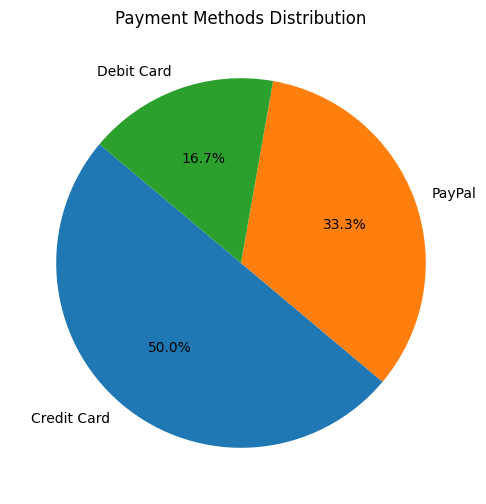

In [15]:
#df.head()
payment_methods = df['Payment Method'].value_counts()


plt.figure(figsize=(8, 6))
payment_methods.plot.pie(autopct='%1.1f%%', startangle=140)# the second % is used for showing % sign on the chart
plt.title('Payment Methods Distribution')
plt.ylabel('')
plt.show()


### Heatmap of sales by region/product category

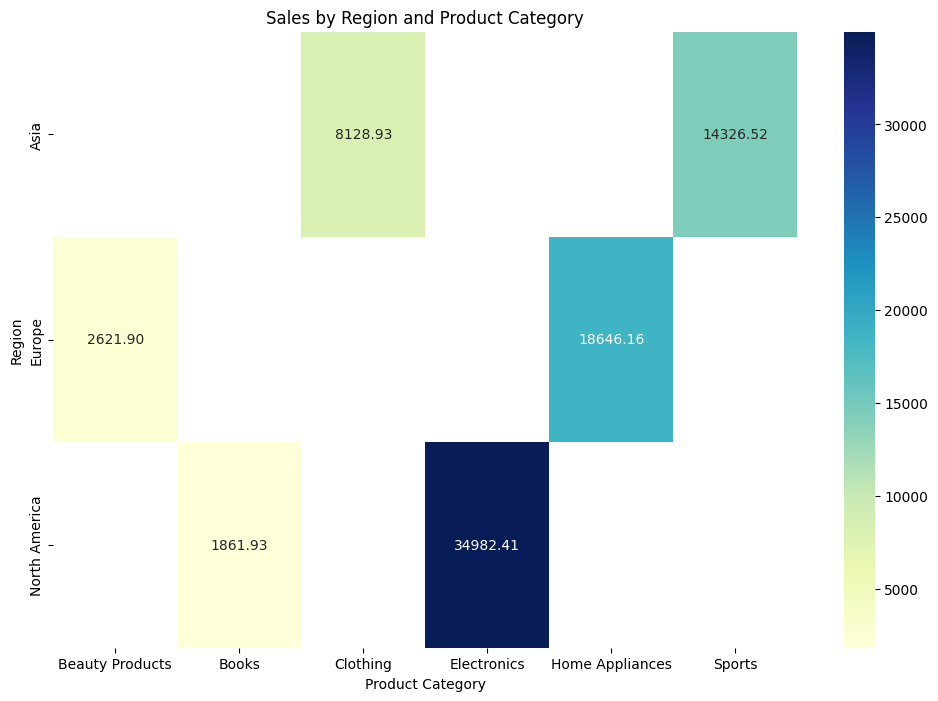

In [16]:

pivot_table = df.pivot_table(values='Total Revenue', index='Region', columns='Product Category', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Sales by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()


### Units Sold Distribution

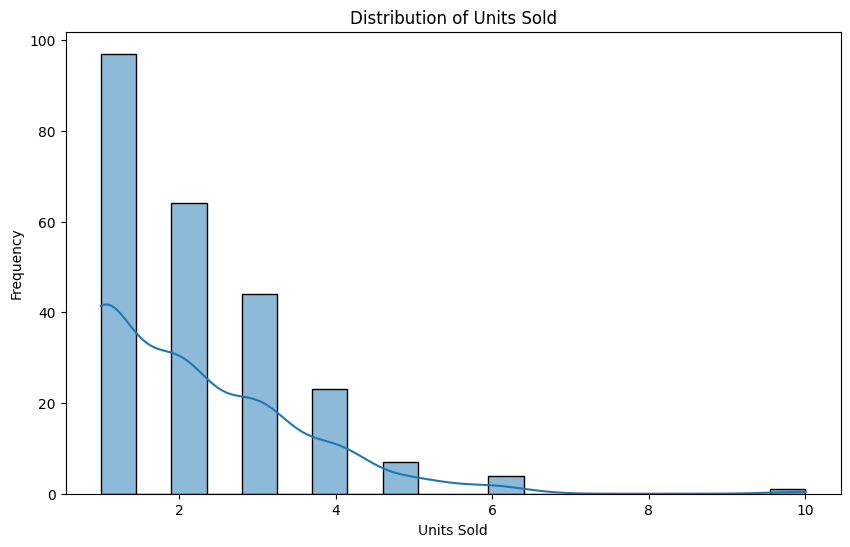

In [17]:
# Distribution plot of units sold
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold'], kde=True, bins=20)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


### Regression Analysis
**Unit price vs Total Revenue**

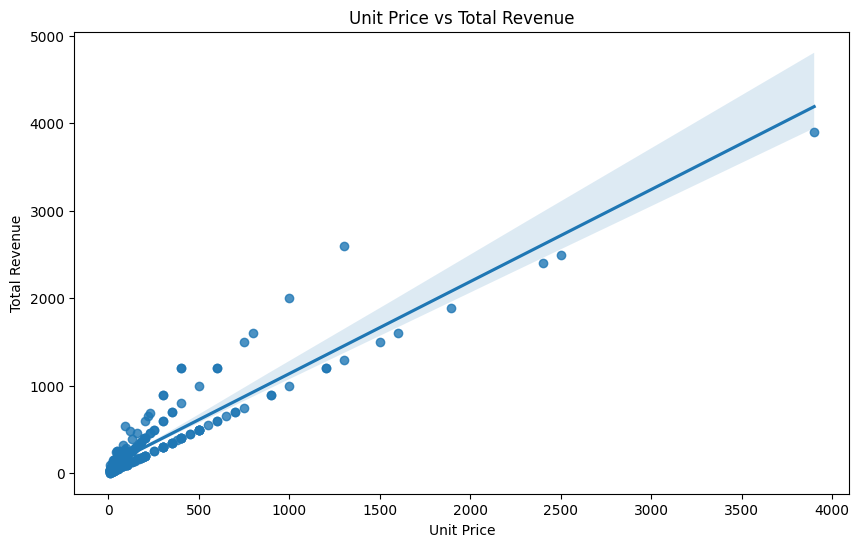

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Unit Price', y='Total Revenue', data=df)# scatter with regression line
plt.title('Unit Price vs Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.show()


The positive slope of the Reg line indicates a +ive relationship between unit price and total revenue. 

The scatter plot shows a clear upward trend, suggesting a strong positive corr bw unit price and total revenue. 

There are some dots that are  distant from the regression line, indicating outliers. These outliers could represent exceptional cases where the total revenue is unusually high or low for a given unit price.
Outliers can provide valuable insights, such as identifying products with exceptional performance 


**Units Sold vs Total Revenue**

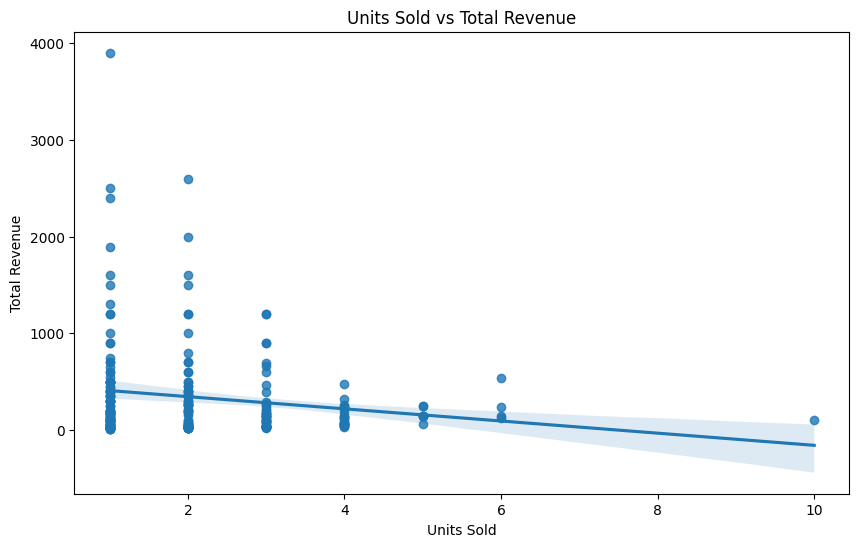

In [19]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Units Sold', y='Total Revenue', data=df)
plt.title('Units Sold vs Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()


There is a slight negative relationship between the number of units sold and total revenue This suggests that selling more units does not necessarily correspond to higher total revenue
There is significant variability in total revenue when fewer units are sold (particularly between 1 and 3 units). This indicates that a small number of units sold can result in a wide range of total revenues, influenced by unit prices.

Outliers: A few outliers exist, especially at higher total revenue levels for low units sold. These could represent high-value items sold in small quantities.

The trend suggests that as more units are sold, the total revenue tends to decrease slightly, which could be indicative of discounts or lower-priced items being sold in bulk.

### transaction with the highest total revenue

In [20]:
transaction = df.loc[df['Total Revenue'].idxmax()]
transaction

Transaction ID                    10103
Date                2024-04-12 00:00:00
Product Category            Electronics
Product Name        Canon EOS R5 Camera
Units Sold                            1
Unit Price                      3899.99
Total Revenue                   3899.99
Region                    North America
Payment Method              Credit Card
Name: 102, dtype: object

###  product with the highest units sold

In [21]:
top_product_units = df.loc[df['Units Sold'].idxmax()]
top_product_units


Transaction ID                          10063
Date                      2024-03-03 00:00:00
Product Category                     Clothing
Product Name        Hanes ComfortSoft T-Shirt
Units Sold                                 10
Unit Price                               9.99
Total Revenue                            99.9
Region                                   Asia
Payment Method                     Debit Card
Name: 62, dtype: object

### product with most revenue produced

In [22]:
prod= df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending = False)
prod 

Product Name
Canon EOS R5 Camera                            3899.99
LG OLED TV                                     2599.98
MacBook Pro 16-inch                            2499.99
Apple MacBook Pro 16-inch                      2399.00
iPhone 14 Pro                                  1999.98
                                                ...   
Neutrogena Hydro Boost Water Gel                 16.99
Biore UV Aqua Rich Watery Essence Sunscreen      15.00
The Ordinary Hyaluronic Acid Serum                6.80
The Ordinary Caffeine Solution 5% + EGCG          6.70
The Ordinary Niacinamide Serum                    6.50
Name: Total Revenue, Length: 232, dtype: float64

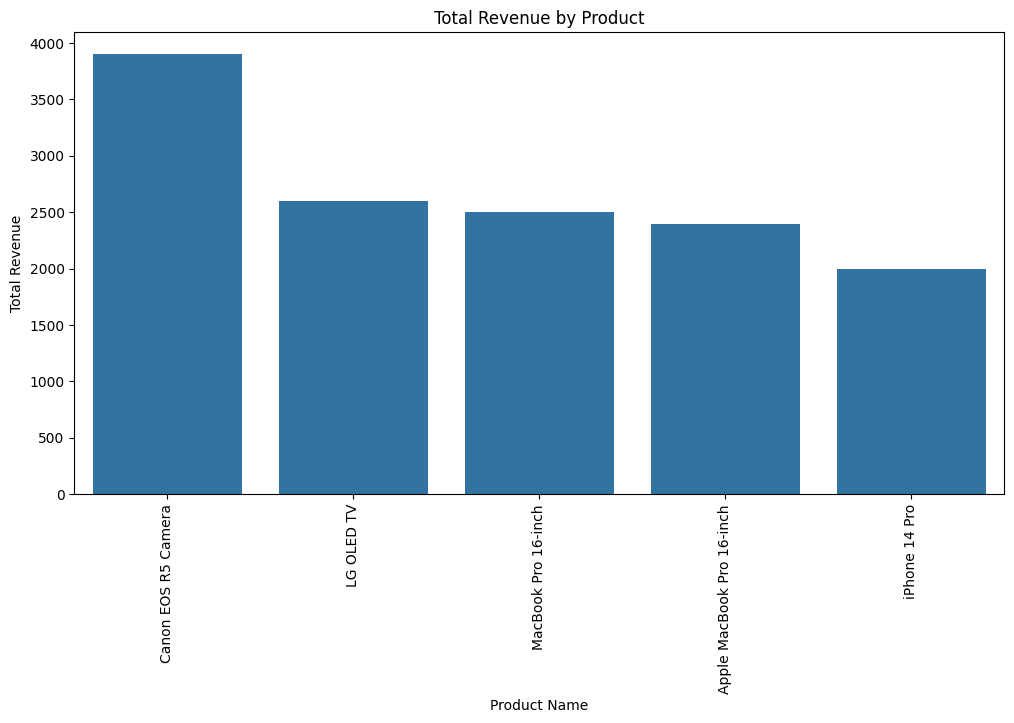

In [23]:
prod= df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending = False)
top5=prod.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top5.index, y=top5.values)
plt.title('Total Revenue by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

### Conclusion and Analysis

**Top Performing Regions:** 
The analysis identifies regions contributing the most to total revenue. Focus on (North America, Asia) for future marketing and sales efforts.

**Top Products:**

The top 5 products by revenue are Cannon Camera, LG TV, MacBook, and iphone 14 pro. These products are popular among customers and should be prioritized in inventory management and marketing strategies.

**Category Analysis:**

Electronic, Sports and home appliances Category drive signigficant revenue. These categories should be the focal point for expanding product lines

**Seasonal Trends:**
Our Sales data over time reveal seasonal trends and peak periods. Preparing for these peaks with adequate inventory and marketing can optimize sales.

**Payement Methods and Discounts**
The most used payment methods are Debitcard and paypal. Offering discounts  on these methods could enhance customer satisfaction and loyalty. If discounts significantly boost sales, they can be strategically used during off-peak times.




In [25]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### Sales Forecasting with ARIMA

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Local\Temp\ipykernel_17996\3423825647.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1], periods=12, freq='M')


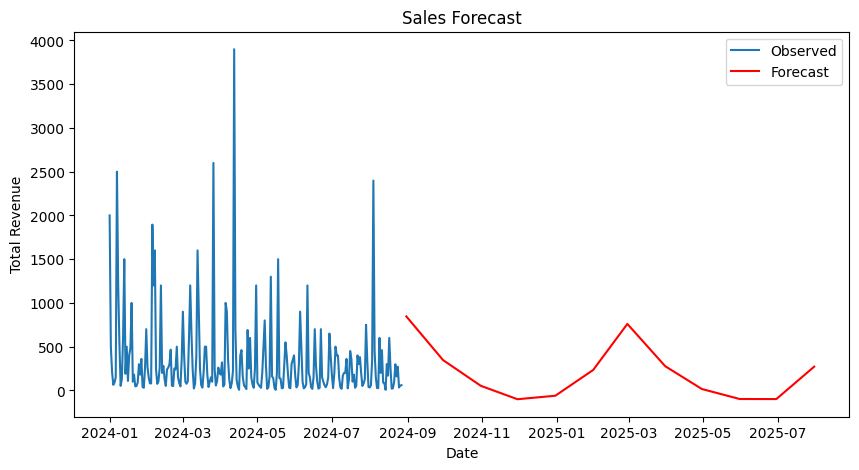

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


sales_data = df.groupby('Date')['Total Revenue'].sum().reset_index()# aggrigate sales by date
sales_data.set_index('Date', inplace=True)


model = SARIMAX(sales_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))# MODEL - forcasts sales of next 12Months
model_fit = model.fit(disp=False)


forecast = model_fit.get_forecast(steps=12)#FOrecast sales
forecast_index = pd.date_range(start=sales_data.index[-1], periods=12, freq='M')
forecast_series = forecast.predicted_mean
forecast_series.index = forecast_index

plt.figure(figsize=(10, 5))#visualization
plt.plot(sales_data, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Sales Forecast')
plt.legend()
plt.show()


**Forecast data - 2024/08 - 2025/07**
The model predicts 2 peaks in sept and another in Feb 2025. THese peaks may be due to seasonal events, holiday or promtional periods. Sales are expected to be low during october to Jan and then again from march to june.
